In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

import sys
sys.path.append('..')
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 8,
    "font.family": "Helvetica"
})

column_width = 3.375
bigger_font_size=10

purple = plt.get_cmap("Purples")
orange = plt.get_cmap("Oranges")

data_prepend = './'
data_prepend = 'public_data/'

#### Figure 6, supplement

In [2]:
N = 12
frac_test = 0.25
frac_train = 1-frac_test

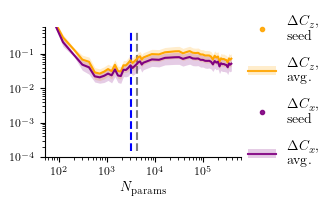

In [3]:
seeds = np.arange(10,101,10)
show_seeds = False

fig,ax = plt.subplots(1, 1, figsize=(0.75*column_width,0.5*column_width))

path = data_prepend + 'A28/IsingChain_h-1.0_N12/TestTrain/testSize0.25_random/hellinger/bs_64/'
z_corr_dict = np.load(path + 'z_corr_dict.npy', allow_pickle=True).item()
x_corr_dict = np.load(path + 'x_corr_dict.npy', allow_pickle=True).item()
num_params_dict = np.load(path+'num_params_dict.npy',allow_pickle=True).item()

if show_seeds:
    for seed_i,seed in enumerate(seeds):
        for key_i,key in enumerate(z_corr_dict.keys()):
            (depth_,width_) = key
            z_corr = (np.array(z_corr_dict[key]))[seed_i]
            x_corr = (np.array(x_corr_dict[key]))[seed_i]
            num_params = num_params_dict[key]
            ax.scatter(num_params, z_corr, marker='.', color=orange(seed/max(seeds)), alpha=0.6,s=8)
            ax.scatter(num_params, x_corr, marker='.', color=purple(seed/max(seeds)), alpha=0.6,s=8)

sorted_keys = sorted(num_params_dict.keys(), key=lambda k: num_params_dict[k])
x_avg = []
avg_full, sems_full = [], []
avg_full_x, sems_full_x = [], []
for key in sorted_keys:
    num_params = num_params_dict[key]
    x_avg.append(num_params)
    z_corr_values = np.array(z_corr_dict[key])
    avg_full.append(np.mean(z_corr_values))
    sems_full.append(np.std(z_corr_values) / np.sqrt(len(z_corr_values)))
    x_corr_values = np.array(x_corr_dict[key])
    avg_full_x.append(np.mean(x_corr_values))
    sems_full_x.append(np.std(x_corr_values) / np.sqrt(len(x_corr_values)))
avg_full = np.array(avg_full)
sems_full = np.array(sems_full)
avg_full_x = np.array(avg_full_x)
sems_full_x = np.array(sems_full_x)

ax.errorbar(x_avg, avg_full,  fmt='-', color='orange',capsize=0)
ax.fill_between(x_avg,avg_full-sems_full, avg_full+sems_full,linewidth=0,color='orange',alpha=0.2)
ax.errorbar(x_avg, avg_full_x,  fmt='-', color='purple',capsize=0)
ax.fill_between(x_avg,avg_full_x-sems_full_x, avg_full_x+sems_full_x,linewidth=0,color='purple',alpha=0.2)

ax.vlines(2**N,1.5*10**-4,5*10**-1,linestyle='--',color='grey',zorder=-1)
ax.vlines(2**N*frac_train,1.5*10**-4,5*10**-1,linestyle='--',color='b',zorder=-1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(1e-4, 6e-1)
ax.set_xlim(5e1, 6e5)
ax.tick_params(axis='both', labelsize=bigger_font_size-2)


train_patch = mpatches.Patch(color='orange',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='purple',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='orange',alpha=0.9,label=r'$\Delta C_z,$'+'\n'+r'$\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='purple',alpha=0.9,label=r'$\Delta C_x,$'+'\n'+r'$\mathrm{avg.}$')
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='orange',alpha=0.9,label=r'$\Delta C_z,$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='purple',alpha=0.9,label=r'$\Delta C_x,$'+'\n'+r'$\mathrm{seed}$')
handles = [
    train_marker, (train_patch,train_line),
    test_marker, (test_patch,test_line)]
labels = [train_marker.get_label(),train_line.get_label(),
        test_marker.get_label(),test_line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.88,0.5),labelspacing=1,fontsize=bigger_font_size)

plt.savefig(f'./figures/corr_xz_uniform.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

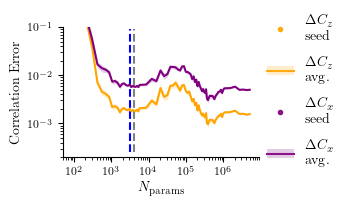

In [4]:
seeds = np.arange(10,101,10)
show_seeds = False

fig,ax = plt.subplots(1, 1, figsize=(0.75*column_width,0.5*column_width))

path = data_prepend + 'A29_largeWidths/IsingChain_h-1.0_N12/TestTrain/testSize0.25_probs/hellinger/bs_64/'
z_corr_dict = np.load(path + 'z_corr_dict.npy', allow_pickle=True).item()
x_corr_dict = np.load(path + 'x_corr_dict.npy', allow_pickle=True).item()
num_params_dict = np.load(path+'num_params_dict.npy',allow_pickle=True).item()

if show_seeds:
    for seed_i,seed in enumerate(seeds):
        for key_i,key in enumerate(z_corr_dict.keys()):
            (depth_,width_) = key
            z_corr = (np.array(z_corr_dict[key]))[seed_i]
            x_corr = (np.array(x_corr_dict[key]))[seed_i]
            num_params = num_params_dict[key]
            ax.scatter(num_params, z_corr, marker='.', color=orange(seed/max(seeds)), alpha=0.6,s=8)
            ax.scatter(num_params, x_corr, marker='.', color=purple(seed/max(seeds)), alpha=0.6,s=8)

sorted_keys = sorted(num_params_dict.keys(), key=lambda k: num_params_dict[k])
x_avg = []
avg_full, sems_full = [], []
avg_full_x, sems_full_x = [], []
for key in sorted_keys:
    num_params = num_params_dict[key]
    x_avg.append(num_params)
    z_corr_values = np.array(z_corr_dict[key])
    avg_full.append(np.mean(z_corr_values))
    sems_full.append(np.std(z_corr_values) / np.sqrt(len(z_corr_values)))
    x_corr_values = np.array(x_corr_dict[key])
    avg_full_x.append(np.mean(x_corr_values))
    sems_full_x.append(np.std(x_corr_values) / np.sqrt(len(x_corr_values)))
avg_full = np.array(avg_full)
sems_full = np.array(sems_full)
avg_full_x = np.array(avg_full_x)
sems_full_x = np.array(sems_full_x)

ax.errorbar(x_avg, avg_full,  fmt='-', color='orange',capsize=0)
ax.fill_between(x_avg,avg_full-sems_full, avg_full+sems_full,linewidth=0,color='orange',alpha=0.2)
ax.errorbar(x_avg, avg_full_x,  fmt='-', color='purple',capsize=0)
ax.fill_between(x_avg,avg_full_x-sems_full_x, avg_full_x+sems_full_x,linewidth=0,color='purple',alpha=0.2)

ax.vlines(2**N,2.5*10**-4,9*10**-2,linestyle='--',color='grey',zorder=-1)
ax.vlines(2**N*frac_train,2.5*10**-4,9*10**-2,linestyle='--',color='b',zorder=-1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\mathrm{Correlation}$ $\mathrm{Error}$', fontsize=bigger_font_size)
ax.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(2e-4, 1e-1)
ax.set_xlim(5e1, 9e6)
ax.tick_params(axis='both', labelsize=bigger_font_size-2)


train_patch = mpatches.Patch(color='orange',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='purple',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='orange',alpha=0.9,label=r'$\Delta C_z$'+'\n'+r'$\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='purple',alpha=0.9,label=r'$\Delta C_x$'+'\n'+r'$\mathrm{avg.}$')
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='orange',alpha=0.9,label=r'$\Delta C_z$'+'\n'+r'$\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='purple',alpha=0.9,label=r'$\Delta C_x$'+'\n'+r'$\mathrm{seed}$')
handles = [
    train_marker, (train_patch,train_line),
    test_marker, (test_patch,test_line)]
labels = [train_marker.get_label(),train_line.get_label(),
        test_marker.get_label(),test_line.get_label()]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.88,0.5),labelspacing=1,fontsize=bigger_font_size)

plt.savefig(f'./figures/corr_xz.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()